In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model

In [65]:
# Wczytaj dane wejściowe z pierwszego pliku Excel
input_data = pd.read_excel("C:/Users/mbkil/excele/Avalon_fingerprints.xlsx")
input_data = input_data.iloc[:, :512] # wybierz pierwsze 512 kolumn jako dane wejściowe

# Wczytaj dane wyjściowe z drugiego pliku Excel
output_data = pd.read_excel("C:/Users/mbkil/excele/TC.XLSX")

# Podzielenie danych wejściowych i wyjściowych na zbiory treningowe, walidacyjne i testowe
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.4, random_state=42)


In [102]:
input_data

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_503,Col_A_504,Col_A_505,Col_A_506,Col_A_507,Col_A_508,Col_A_509,Col_A_510,Col_A_511,Col_A_512
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
output_data

,Critical_Temperature
0,173.70
1,304.26
2,364.59
3,423.90
4,469.70
...,...
495,549.00
496,577.20
497,570.76
498,504.03


In [100]:

# Zdefiniowanie modelu sieci neuronowej
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(512,), activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# Skompilowanie modelu
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Trenowanie modelu na zbiorze treningowym
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

_, mae = model.evaluate(X_test, y_test)
print("MAE:", mae)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)


Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 309449.0938 - mean_absolute_error: 553.0726 - val_loss: 311375.7812 - val_mean_absolute_error: 550.4317
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 298663.4688 - mean_absolute_error: 543.2933 - val_loss: 288513.2812 - val_mean_absolute_error: 529.7433
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 252845.6250 - mean_absolute_error: 498.9082 - val_loss: 206664.4062 - val_mean_absolute_error: 446.3270
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 132912.0938 - mean_absolute_error: 346.0258 - val_loss: 65005.5273 - val_mean_absolute_error: 221.7034
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 47829.3086 - mean_absolute_error: 171.4249 - val_loss: 40380.4141 - val_mean_absolute_error: 147.8147
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 32763.2754 - mean_absolute_error: 138.6336 -

In [101]:
print("Train R2:", r2_score(y_train, y_train_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.832575408671641
Validation R2: 0.5879516235681139
Test R2: 0.47319717799488514


In [91]:
model.save("trained_modelv1.h5")

2/2 [==============================] - 0s 3ms/step


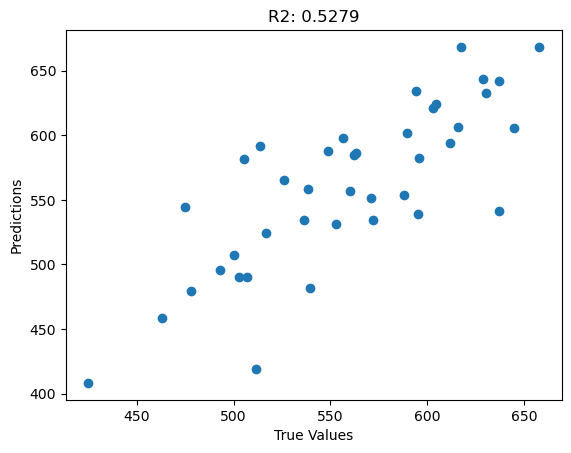

In [92]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("R2: {:.4f}".format(r2))
plt.show()

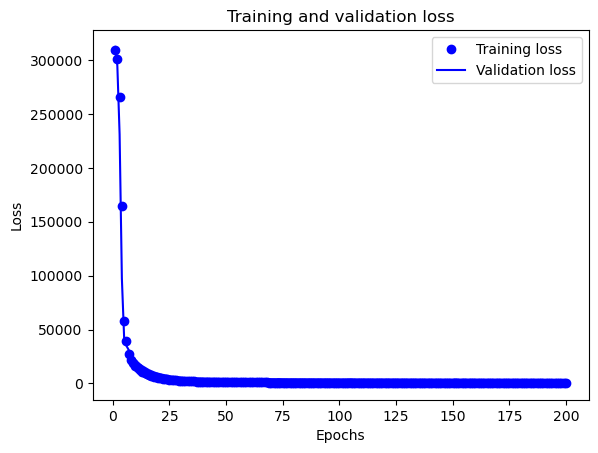

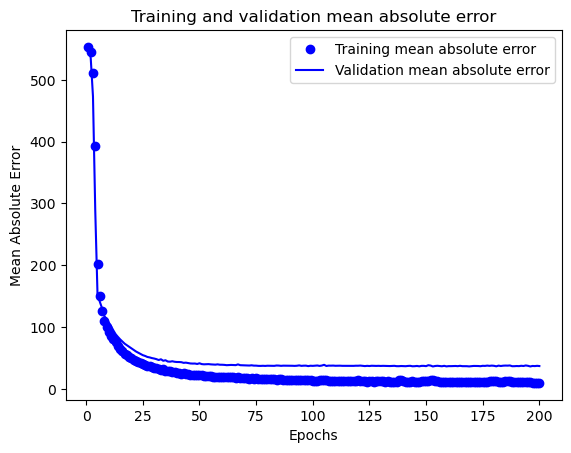

In [93]:

history_dict = history.history

# Wykres dla błędu średniokwadratowego (loss)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Wykres dla błędu średniej wartości bezwzględnej (mean absolute error)
mae_values = history_dict['mean_absolute_error']
val_mae_values = history_dict['val_mean_absolute_error']

plt.plot(epochs, mae_values, 'bo', label='Training mean absolute error')
plt.plot(epochs, val_mae_values, 'b', label='Validation mean absolute error')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

In [95]:
# ładuj wytrenowany model
loaded_model = load_model('trained_modelv1.h5')

# Skompilowanie modelu
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00000001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# trenuj model na danych
history = loaded_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

_, mae = model.evaluate(X_test, y_test)
print("MAE:", mae)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)


Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 526.6145 - mean_absolute_error: 13.4635 - val_loss: 3235.9358 - val_mean_absolute_error: 36.9651
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 520.9515 - mean_absolute_error: 13.0113 - val_loss: 3323.1572 - val_mean_absolute_error: 37.6779
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 487.4636 - mean_absolute_error: 11.6403 - val_loss: 3265.0718 - val_mean_absolute_error: 36.6562
Epoch 4/50
13/13 [==============================] - 0s 7ms/step - loss: 482.8829 - mean_absolute_error: 11.9583 - val_loss: 3258.3115 - val_mean_absolute_error: 37.8724
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 457.7983 - mean_absolute_error: 10.7801 - val_loss: 3310.1672 - val_mean_absolute_error: 37.2580
Epoch 6/50
13/13 [==============================] - 0s 8ms/step - loss: 494.7110 - mean_absolute_error: 12.5309 - val_loss: 3290.9021 - val_mean_absolute_

In [97]:
print("Train R2:", r2_score(y_train, y_train_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train R2: 0.8938337589295897
Validation R2: 0.637634950375505
Test R2: 0.17108650055369734
